In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import time
import tqdm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# Regression
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,ElasticNet,ElasticNetCV
from sklearn.metrics import accuracy_score,r2_score

C:\ProgramData\Anaconda1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
lpoint = pd.read_csv('data_regression.csv',dtype={"CLNT_ID": np.str})
print( lpoint.shape )
lpoint.head() # 67만명 

(671470, 59)


,CLNT_ID,ACTIVE_DAYS,N_SESS,N_PRODUCT,N_LOGIN,PURCHASE_CYCLE,HITS_SEQ,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,0000008,118,2,1,2,59.0,57.000000,4.5,46.500000,417.000000,...,0,0,0,0,0,0,0,0,2,0
1,0000014,20,1,2,1,20.0,284.000000,5.0,256.000000,7098.000000,...,0,0,0,0,0,0,0,0,2,0
2,0000032,20,2,4,2,10.0,58.000000,101.4,98.200000,2169.000000,...,0,0,0,0,0,0,0,0,5,0
3,0000056,97,2,2,2,48.5,47.333333,82.0,45.666667,1157.666667,...,0,0,0,0,0,0,1,0,0,2
4,0000058,74,1,5,1,74.0,209.000000,8.0,195.000000,3161.000000,...,0,0,0,1,0,0,0,0,5,0


In [3]:
number = LabelEncoder()
lpoint['CLNT_GENDER'] = number.fit_transform(lpoint['CLNT_GENDER'].astype('str'))
lpoint['CLNT_AGE'] = number.fit_transform(lpoint['CLNT_AGE'].astype('str'))
# labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

# Category : Fashion 

In [4]:
lpoint = lpoint.sort_values(by=['CLAC0_8'],ascending=False)
lpoint.head(15)

,CLNT_ID,ACTIVE_DAYS,N_SESS,N_PRODUCT,N_LOGIN,PURCHASE_CYCLE,HITS_SEQ,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
469036,4736937,183,157,6,150,1.220000,133.599556,945.873811,234.601776,1459.865885,...,0,0,0,0,0,0,0,0,3154,0
206484,2075522,108,71,77,48,2.250000,244.138478,138.885605,421.722496,3845.622879,...,0,1,0,6,0,0,0,2,1779,39
75611,0748826,183,160,65,110,1.663636,115.172870,1410.439206,210.175352,1468.346567,...,0,0,0,5,1,0,0,1,1212,13
491467,4964593,178,242,274,90,1.977778,135.963521,865.095956,219.737510,3398.679619,...,0,0,0,43,0,0,214,2,956,53
643989,6366359,183,231,317,117,1.564103,89.511509,1272.771100,163.433504,1502.520460,...,0,0,0,0,0,0,0,0,952,11
608012,6072971,181,32,8,18,10.055556,234.803324,431.415512,422.903047,3227.030471,...,0,1,0,0,0,0,0,0,716,5
508974,5142305,183,272,511,123,1.487805,157.899029,633.233981,346.353398,2112.133981,...,0,10,0,52,3,0,36,42,678,211
556853,5628642,181,23,7,16,11.312500,245.585546,155.334808,441.150442,3282.871681,...,0,1,0,0,0,0,0,0,675,2
342087,3447474,139,23,12,12,11.583333,240.208075,31.447205,432.720497,3129.122671,...,0,0,0,0,0,0,0,0,644,0
39906,0385420,175,15,34,11,15.909091,119.827957,49.903226,222.440860,2234.129032,...,0,0,0,4,0,0,0,0,576,0


In [79]:
lpoint['CLAC0_8'].value_counts()[:10] / 671470 # 전체 67만명 중 약 57%가 패션의류 구매

0    0.438448
2    0.156591
1    0.136779
3    0.073498
4    0.047852
5    0.029486
6    0.021851
7    0.015435
8    0.012141
9    0.009096
Name: CLAC0_8, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a9a1216d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9a12209b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9a1216be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9a1220eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9a122a668>],
 'means': []}

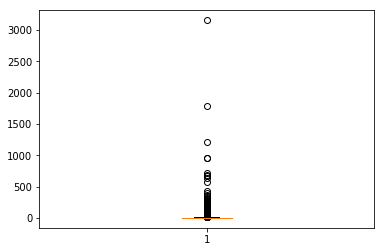

In [32]:
plt.boxplot(lpoint['CLAC0_8'])

In [50]:
lpoint.columns

Index(['CLNT_ID', 'ACTIVE_DAYS', 'N_SESS', 'N_PRODUCT', 'N_LOGIN',
       'PURCHASE_CYCLE', 'HITS_SEQ', 'SESS_SEQ', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'PD_BUY_AM', 'TOTAL_BUY_AM', 'TOTAL_AM', 'CLNT_GENDER',
       'CLNT_AGE', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend', 'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3',
       'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9'],
      dtype='object')

In [51]:
Xvariable = ['ACTIVE_DAYS', 'N_SESS', 'N_PRODUCT', 'N_LOGIN',
       'PURCHASE_CYCLE', 'HITS_SEQ', 'SESS_SEQ', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'PD_BUY_AM', 'TOTAL_BUY_AM', 'TOTAL_AM', 'CLNT_GENDER',
       'CLNT_AGE', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(lpoint[Xvariable], lpoint['CLAC0_8'], test_size=0.3)

## OLS

In [53]:
# Statsmodel.Api Method
model1 = sm.OLS(y_train,x_train)
result1 = model1.fit()

In [54]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CLAC0_8   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 4.594e+04
Date:                Fri, 11 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:07:00   Log-Likelihood:            -1.3122e+06
No. Observations:              470029   AIC:                         2.624e+06
Df Residuals:                  469985   BIC:                         2.625e+06
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ACTIVE_DAYS              -0.0011      0.000     -6.860      0.000      -0.001      -0.001
N_SESS                    0.1596      0.008     20.870      0.000       0.145       0.175
N_PRODUCT                -0.3447      0.002   -142.527      0.000      -0.349      -0.340
N_LOGIN                  -0.2586      0.010    -27.159      0.000      -0.277      -0.240
PURCHASE_CYCLE           -0.0006      0.000     -3.251      0.001      -0.001      -0.000
HITS_SEQ                  0.0022      0.000      9.508      0.000       0.002       0.003
SESS_SEQ              -3.938e-05   5.01e-05     -0.786      0.432      -0.000    5.88e-05
TOT_PAG_VIEW_CT          -0.0005      0.000     -2.150      0.032      -0.001    -4.2e-05
TOT_SESS_HR_V         -5.029e-05   7.74e-06     -6.501      0.000   -6.54e-05   -3.51e-05
PD_BUY_AM             -2.617e-06   2.79e-07     -9.370      0.000   -3.16e-06   -2.07e-06
TOTAL_BUY_AM           3.005e-06   2.72e-07     11.049      0.000    2.47e-06    3.54e-06
TOTAL_AM              -3.738e-07   9.46e-09    -39.499      0.000   -3.92e-07   -3.55e-07
CLNT_GENDER              -0.0623      0.016     -3.851      0.000      -0.094      -0.031
CLNT_AGE                 -0.0062      0.005     -1.143      0.253      -0.017       0.004
DVC_desktop              -0.1748      0.005    -37.760      0.000      -0.184      -0.166
DVC_mobile                0.3799      0.002    155.906      0.000       0.375       0.385
DVC_tablet                0.3312      0.006     53.504      0.000       0.319       0.343
ZON_Busan                 0.1625      0.002     98.925      0.000       0.159       0.166
ZON_Chungcheongbuk-do     0.0597      0.004     15.027      0.000       0.052       0.068
ZON_Chungcheongnam-do     0.0704      0.003     24.945      0.000       0.065       0.076
ZON_Daegu                 0.0083      0.003      3.037      0.002       0.003       0.014
ZON_Daejeon               0.0347      0.004      9.655      0.000       0.028       0.042
ZON_Gangwon-do           -0.0798      0.004    -22.219      0.000      -0.087      -0.073
ZON_Gwangju               0.0403      0.003     12.840      0.000       0.034       0.046
ZON_Gyeonggi-do           0.0520      0.002     34.472      0.000       0.049       0.055
ZON_Gyeongsangbuk-do      0.0363      0.003     13.521      0.000       0.031       0.042
ZON_Gyeongsangnam-do      0.1718      0.002     99.287      0.000       0.168       0.175
ZON_Incheon               0.0729      0.003     26.209      0.000       0.067       0.078
ZON_Jeju-do               0.0120      0.007      1.675      0.094      -0.002       0.026
ZON_Jeollabuk-do          0.0324      0.002     14.389      0.000       0.028       0.037
ZON_Jeollanam-do         -0.0290      0.004     -8.176      0.000      -0.036      -0.022
ZON_Seoul              

In [55]:
y_predict = result1.predict(x_train)
pd.DataFrame({'predict':list(y_predict.values),'actual':list(y_train.values)}).sort_values(by=['predict'],ascending=False).head(10)

,predict,actual
165554,2996.768445,3154
261247,1496.638451,1779
96869,940.714992,162
393866,920.147411,956
170476,604.360559,716
154479,568.090679,675
106285,557.093520,952
215285,456.811629,322
341289,278.327787,143
339526,277.594337,193


In [56]:
r2_score(y_train, y_predict)

0.7937492615815833

In [57]:
y_hat1 = result1.predict(x_test)
r2_score(y_test, y_hat1)

0.6985382574160042

In [11]:
# Sci-Kit Learn Method
model2 = LinearRegression()
result2 = model2.fit(x_train, y_train)

In [12]:
y_hat = result2.predict(x_train)
r2_score(y_train, y_hat)

0.7736909028265286

In [13]:
y_hat2 = result2.predict(x_test)
r2_score(y_test, y_hat2)

0.694689633786278

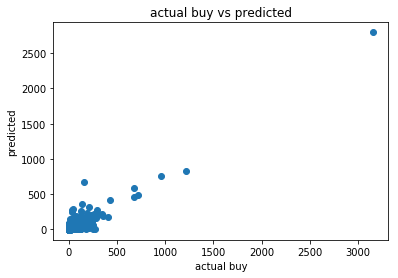

In [14]:
plt.scatter(y_train, y_hat)
plt.xlabel("actual buy")
plt.ylabel("predicted")
plt.title("actual buy vs predicted")
plt.show()

## Elastic Net 

In [58]:
model3 = ElasticNet(random_state=0)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_train)
print('R squared :', r2_score(y_train,y_pred3))

R squared : 0.7857325538286611


In [16]:
model4 = ElasticNetCV(cv = 10, random_state=0)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_train)
print('R squared :', r2_score(y_train,y_pred4))

R squared : 0.461401182877608


In [59]:
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')
cv_model.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
       n_alphas=100, n_jobs=-1, normalize=True, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [60]:
model5 = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_train)
print('R squared :', r2_score(y_train,y_pred5))

R squared : 0.7941816921757638


In [61]:
len(Xvariable)

48

In [62]:
pd.DataFrame(list(zip(Xvariable,model3.coef_)) , columns=['Variable','Coef'])  # 48개 변수 중 15개 선택

,Variable,Coef
0,ACTIVE_DAYS,-1.534712e-03
1,N_SESS,-0.000000e+00
2,N_PRODUCT,-1.951256e-01
3,N_LOGIN,-0.000000e+00
4,PURCHASE_CYCLE,4.254137e-03
5,HITS_SEQ,1.919904e-03
6,SESS_SEQ,-6.239220e-04
7,TOT_PAG_VIEW_CT,0.000000e+00
8,TOT_SESS_HR_V,0.000000e+00
9,PD_BUY_AM,-2.420382e-06


In [66]:
pd.DataFrame({'actual':y_train,'predict':y_pred3}).sort_values(by=['predict'],ascending=False).head(10)

,actual,predict
469036,3154,2843.901503
206484,1779,1463.740722
165948,162,967.621801
491467,956,812.192458
608012,716,573.986191
556853,675,538.784635
539209,322,516.462653
643989,952,484.572974
311451,143,343.852558
408431,193,304.130477


In [67]:
y_hat3 = model3.predict(x_test)
print('R squared :', r2_score(y_test,y_hat3))

R squared : 0.6969731659939877


In [68]:
y_hat5 = model5.predict(x_test)
print('R squared :', r2_score(y_test,y_hat5))

R squared : 0.7002728063286925


# Category : Sports

In [69]:
lpoint = lpoint.sort_values(by=['CLAC0_3'],ascending=False)
lpoint.head(15)

,CLNT_ID,ACTIVE_DAYS,N_SESS,N_PRODUCT,N_LOGIN,PURCHASE_CYCLE,HITS_SEQ,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
122558,1222895,93,3,2,3,31.000000,47.500000,52.500000,41.000000,400.250000,...,0,0,0,452,0,0,0,0,0,0
108628,1081843,136,3,1,3,45.333333,26.000000,17.000000,42.666667,432.333333,...,0,0,0,400,0,0,0,0,0,0
177743,1782801,179,11,5,7,25.571429,73.352941,201.029412,128.147059,2813.852941,...,0,0,0,352,0,0,0,0,0,0
326580,3289736,182,18,21,13,14.000000,106.413793,177.965517,183.068966,1819.241379,...,11,0,0,323,13,1,0,2,11,0
241156,2426355,183,391,377,154,1.188312,100.331776,2004.101246,163.412773,2741.753894,...,8,5,0,303,0,0,104,4,215,26
67343,0664738,140,4,1,4,35.000000,50.857143,4.142857,75.142857,1323.857143,...,0,0,0,287,0,0,0,0,0,0
638728,6323462,97,4,1,3,32.333333,25.000000,35.000000,25.750000,399.250000,...,0,0,0,248,0,0,0,0,0,0
61106,0601701,108,36,39,29,3.724138,41.614286,66.085714,50.314286,1068.457143,...,0,0,0,212,1,0,0,1,0,1
418385,4225837,145,110,128,72,2.013889,157.026616,396.802281,241.612167,4529.258555,...,0,1,0,206,1,0,7,12,30,18
299510,3018197,183,159,121,84,2.178571,98.075269,1561.784946,152.265233,1598.881720,...,22,1,102,200,17,0,0,31,15,12


In [25]:
lpoint['CLAC0_3'].value_counts()[:10] / 671470 # 전체 67만명 중 약 36%가 스포츠 제품 구매

0    0.649490
1    0.129251
2    0.108340
3    0.040784
4    0.023827
5    0.013061
6    0.009003
7    0.005796
8    0.004445
9    0.002964
Name: CLAC0_3, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x21382a284e0>,
 'caps': [<matplotlib.lines.Line2D at 0x21382a28d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x213dfdb8be0>],
 'medians': [<matplotlib.lines.Line2D at 0x21382a1f5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21382a1f9e8>],
 'means': []}

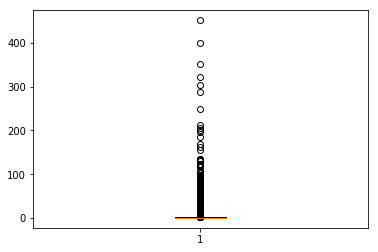

In [26]:
plt.boxplot(lpoint['CLAC0_3'])

In [70]:
x_train, x_test, y_train, y_test = train_test_split(lpoint[Xvariable], lpoint['CLAC0_3'], test_size=0.3)

## OLS

In [71]:
# Statsmodel.Api Method
model1 = sm.OLS(y_train,x_train)
result1 = model1.fit()

In [72]:
y_predict = result1.predict(x_train)
pd.DataFrame({'predict':list(y_predict.values),'actual':list(y_train.values)}).sort_values(by=['predict'],ascending=False).head(10)

,predict,actual
110393,128.373879,303
221337,120.935499,117
316950,117.672572,119
57975,105.882654,52
355449,94.916611,0
406224,78.770470,43
197116,70.629257,64
356245,56.557795,132
207807,56.535163,6
372077,50.759022,38


In [73]:
r2_score(y_train, y_predict)

0.2724974666259544

In [74]:
y_hat1 = result1.predict(x_test)
r2_score(y_test, y_hat1)

0.21655065795697637

In [33]:
# Sci-Kit Learn Method
model2 = LinearRegression()
result2 = model2.fit(x_train, y_train)

In [34]:
y_hat = result2.predict(x_train)
r2_score(y_train, y_hat)

0.2410102452452515

In [35]:
y_hat2 = result2.predict(x_test)
r2_score(y_test, y_hat2)

0.24219579800795776

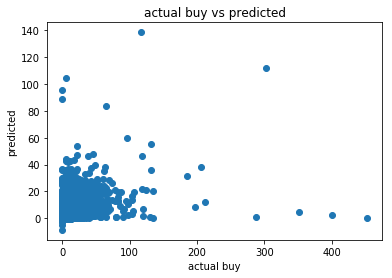

In [36]:
plt.scatter(y_train, y_hat)
plt.xlabel("actual buy")
plt.ylabel("predicted")
plt.title("actual buy vs predicted")
plt.show()

## Elastic Net 

In [62]:
model3 = ElasticNet(random_state=0)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_train)
print('R squared :', r2_score(y_train,y_pred3))

R squared : 0.2302608348363926


In [63]:
model4 = ElasticNetCV(cv = 10, random_state=0)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_train)
print('R squared :', r2_score(y_train,y_pred4))

R squared : 0.08206323931006376


In [64]:
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')
cv_model.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
       n_alphas=100, n_jobs=-1, normalize=True, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [65]:
model5 = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_train)
print('R squared :', r2_score(y_train,y_pred5))

R squared : 0.23679521148226101


In [66]:
pd.DataFrame(list(zip(Xvariable,model3.coef_)) , columns=['Variable','Coef'])  

,Variable,Coef
0,HITS_SEQ,-5.478562e-04
1,PD_BUY_AM,-3.155272e-07
2,SESS_SEQ,1.082487e-03
3,TOT_PAG_VIEW_CT,1.777819e-03
4,TOT_SESS_HR_V,2.150185e-05
5,DVC_desktop,-0.000000e+00
6,DVC_mobile,1.045047e-01
7,DVC_tablet,0.000000e+00
8,ZON_Busan,-1.145049e-02
9,ZON_Chungcheongbuk-do,0.000000e+00


In [67]:
pd.DataFrame({'actual':y_train,'predict':y_pred3}).sort_values(by=['predict'],ascending=False).head(20)

,actual,predict
206484,6,176.436936
469036,0,150.656161
75611,5,117.833287
508974,52,112.540457
643989,0,83.282550
161490,0,73.966599
241156,303,71.755091
311451,119,71.479385
382326,22,69.524926
242133,69,67.142334


In [68]:
y_hat3 = model3.predict(x_test)
print('R squared :', r2_score(y_test,y_hat3))

R squared : 0.21071480475347926


In [69]:
y_hat5 = model5.predict(x_test)
print('R squared :', r2_score(y_test,y_hat5))

R squared : 0.2158503483043518


## 20대 여자 : Fashion 

In [37]:
female = lpoint.loc[lpoint['CLNT_GENDER']==0]
f_20 = female.loc[female['CLNT_AGE']==3 ]
f_20 = f_20.drop(['CLNT_GENDER','CLNT_AGE'], axis=1)
f_30 = female.loc[female['CLNT_AGE']==5 ]
f_30 = f_30.drop(['CLNT_GENDER','CLNT_AGE'], axis=1)

In [38]:
f_20['CLAC0_8'].value_counts()[:10]/len(f_20)  # 약 64%가 패션의류 구매

0    0.365130
2    0.155368
1    0.137764
3    0.081474
4    0.055741
5    0.036501
6    0.027435
7    0.020166
8    0.016479
9    0.012470
Name: CLAC0_8, dtype: float64

In [39]:
f_30['CLAC0_8'].value_counts()[:10]/len(f_30)  # 약 58%가 패션의류 구매

0    0.426797
2    0.154070
1    0.130550
3    0.076374
4    0.050476
5    0.025899
6    0.020877
7    0.017970
8    0.012949
9    0.010835
Name: CLAC0_8, dtype: float64

In [40]:
Xvariable = ['HITS_SEQ', 'PD_BUY_AM', 'SESS_SEQ', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(f_20[Xvariable], f_20['CLAC0_8'], test_size=0.3)

## OLS

In [42]:
# Statsmodel.Api Method
model1 = sm.OLS(y_train,x_train)
result1 = model1.fit()

In [43]:
y_predict = result1.predict(x_train)
pd.DataFrame({'predict':list(y_predict.values),'actual':list(y_train.values)}).sort_values(by=['predict'],ascending=False).head(10)

,predict,actual
19334,3001.141452,3154
2490,886.713635,956
50093,631.983577,678
70063,329.856716,215
107121,286.435500,238
67390,260.660563,79
119913,243.211851,128
111728,242.262111,263
113326,232.782249,360
61463,229.701437,296


In [44]:
r2_score(y_train, y_predict)  # 77% : train set

0.8763631061142962

In [45]:
y_hat1 = result1.predict(x_test)
r2_score(y_test, y_hat1)  # 69% : test set

0.6771921168354965